## Problem statement :

Bank XYZ has been observing a lot of customers closing their accounts or switching to competitor banks over the past couple of quarters. As such, this has caused a huge dent in the quarterly revenues and might drastically affect annual revenues for the ongoing financial year, causing stocks to plunge and market cap to reduce by X %. A team of business, product, engineering and data science folks have been put together to arrest this slide. 

__Objective__ : Can we build a model to predict, with a reasonable accuracy, the customers who are going to churn in the near future? Being able to accurately estimate when they are going to churn will be an added bonus

__Definition of churn__ : A customer having closed all their active accounts with the bank is said to have churned. Churn can be defined in other ways as well, based on the context of the problem. A customer not transacting for 6 months or 1 year can also be defined as to have churned, based on the business requirements.

* Business metrics : If we take Recall target as __70%__ which means correctly identifying 70% of customers who's going to churn in the near future, we can expect that due to business intervention (offers, getting in touch with customers etc.), 50% of the customers can be saved from being churned, which means atleast a __35%__ improvement in Churn Rate

__Product Manager's perspective :__  

(1) Business goal : Arrest decrease in revenues or loss of active customers of bank

(2) Identify data source : There are different source of data. Some of these could be Transactional systems, event-based logs, Data warehouse (MySQL DBs, Redshift/AWS), Data Lakes, NoSQL DBs.

(3) Audit for data quality : De-duplication of events/transactions, Complete or partial absence of data for chunks of time in between, Obscuring PII (personal identifiable information) data 

(4) Business and Data-related metrics : Tracking these metrics over time, probably through some intuitive visualizations
    
    (i) Business metrics : Churn rate (month-on-month, weekly/quarterly), Trend of avg. number of products per customer, 
        %age of dormant customers, Other such descriptive metrics
    
    (ii) Data-related metrics : F1-score, Recall, Precision
         Recall = TP/(TP + FN) 
         Precision = TP/(TP + FP)
         F1-score = Harmonic mean of Recall and Precision
         where, TP = True Positive, FP = False Positive and FN = False Negative

(5) Prediction model output format : These models doesn't require deployment. Instead, we can run these models periodically (monthly/quarterly) and the list of customers along with their propensity to churn can be shared with the business (Sales/Marketing) or Product team.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------Split Train and validation Data----------
from sklearn.model_selection import train_test_split

# -----Classification ML Algorithms--------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

# ----------HyperParameter Tuning --------------
from sklearn.model_selection import GridSearchCV

# ---------Evaluating Performance Metrics-------
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# ---------SMOTE for OvrSampling----------------
from imblearn.over_sampling import SMOTE

# --------Supress Future Warning----------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../input/AfterDataCleaning.csv')

In [3]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

## Keeping aside a test/holdout set
X_train, X_test, y_train_df, y_test = train_test_split(X,Y, test_size=0.1, random_state=1234)


## Splitting into train and validation set
X_train_df, X_validation, y_train_df, y_validation = train_test_split(X_train, y_train_df, test_size = 0.12, random_state = 1234)

print(f'Shape of Training Dataset is - X_train_df is- {X_train_df.shape} and y_train_df is- {y_train_df.shape}')
print(f'Shape of Validation Dataset is - X_validation is- {X_validation.shape} and y_validation is- {y_validation.shape}')
print(f'Shape of Test Dataset is - X_test is- {X_test.shape} and y_test is- {y_test.shape}')

Shape of Training Dataset is - X_train_df is- (7920, 10) and y_train_df is- (7920,)
Shape of Validation Dataset is - X_validation is- (1080, 10) and y_validation is- (1080,)
Shape of Test Dataset is - X_test is- (1000, 10) and y_test is- (1000,)


In [5]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, X_training_data, X_validation_data, y_training_data, y_validation_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and validation results
    score_list=[] 
    
    pred_train = model.predict(X_training_data)
    pred_validation = model.predict(X_validation_data)
    
    train_acc = accuracy_score(y_training_data, pred_train)
    validation_acc = accuracy_score(y_validation_data, pred_validation)
    
    train_recall = recall_score(y_training_data,pred_train)
    validation_recall = recall_score(y_validation_data,pred_validation)
    
    train_precision = precision_score(y_training_data,pred_train)
    validation_precision = precision_score(y_validation_data,pred_validation)
    
    train_f1 = f1_score(y_training_data,pred_train)
    validation_f1 = f1_score(y_validation_data,pred_validation)

    score_list.extend((train_acc,validation_acc,train_recall,validation_recall,train_precision,validation_precision,train_f1,validation_f1))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(y_training_data,pred_train))
        print("Accuracy on validation set : ",accuracy_score(y_validation_data,pred_validation))
        print("Recall on training set : ",recall_score(y_training_data,pred_train))
        print("Recall on validation set : ",recall_score(y_validation_data,pred_validation))
        print("Precision on training set : ",precision_score(y_training_data,pred_train))
        print("Precision on validation set : ",precision_score(y_validation_data,pred_validation))
        print("F1-Score on training set : ",f1_score(y_training_data,pred_train))
        print("F1-Score on validation set : ",f1_score(y_validation_data,pred_validation))
    
    return score_list # returning the list with train and validation scores

In [6]:
def get_summary_of_models(models):
    # defining list of models

    # defining empty lists to add train and validation results
    acc_train = []
    acc_validation = []
    recall_train = []
    recall_validation = []
    precision_train = []
    precision_validation = []
    f1_train =[]
    f1_validation = []
    roc_auc_train = []
    roc_auc_validation = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_metrics_score(model,X_train_df, X_validation, y_train_df, y_validation,False)
            acc_train.append(np.round(j[0],2))
            acc_validation.append(np.round(j[1],2))
            recall_train.append(np.round(j[2],2))
            recall_validation.append(np.round(j[3],2))
            precision_train.append(np.round(j[4],2))
            precision_validation.append(np.round(j[5],2))
            f1_train.append(np.round(j[6],2))
            f1_validation.append(np.round(j[7],2))
    
    model_metrics = pd.DataFrame({'TrainAccuracy': acc_train, 'validationAccuracy': acc_validation, 'Train_Recall':recall_train, 
                                  'validationRecall':recall_validation, 'TrainPrecision':precision_train, 'validationPrecision':precision_validation, 
                                  'TrainF1Score':f1_train, 'validationF1Score':f1_validation
                                 })
    
    return model_metrics

In [7]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_ROC_AUC_score(model, X_training_data, X_validation_data, y_training_data, y_validation_data, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and validation results
    score_list=[] 
    
    pred_train_prob = model.predict_proba(X_training_data)
    pred_train_prob = pred_train_prob[:,1]
    train_auc = roc_auc_score(y_training_data, pred_train_prob)
    pred_validation_prob = model.predict_proba(X_validation_data)
    pred_validation_prob = pred_validation_prob[:,1]
    validation_auc = roc_auc_score(y_validation_data,pred_validation_prob)

    score_list.extend((train_auc,validation_auc))
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:    
        print("ROC AUC Score on training set : ",roc_auc_score(y_training_data,pred_train_prob))
        print("ROC AUC Score on validation set : ",roc_auc_score(y_validation_data,pred_validation_prob))
        
    return score_list

In [8]:
def get_ROC_AUC_score_of_models(models):
    # defining list of models

    roc_auc_train = []
    roc_auc_validation = []
    
    # looping through all the models to get the accuracy, precall and precision scores
    for idx,model in enumerate(models):
            #print(model)
            j = get_ROC_AUC_score(model,X_train_df, X_validation, y_train_df, y_validation,False)
            roc_auc_train.append(np.round(j[0],2))
            roc_auc_validation.append(np.round(j[1],2))
    
    model_auc_score = pd.DataFrame({'Train ROC-AUC Score': roc_auc_train, 'validation ROC-AUC Score': roc_auc_validation})
    
    return model_auc_score

## 1. Logistic Regression

In [9]:
lr_model = LogisticRegression(class_weight='balanced', random_state=123)
lr_model.fit(X_train_df,y_train_df)
y_lr_train_predicted = lr_model.predict(X_train_df)
y_lr_validation_predicted = lr_model.predict(X_validation)
metrics.accuracy_score(y_train_df,y_lr_train_predicted)
#Using above defined function to get accuracy, recall and precision on train and validation set
lr_score=get_metrics_score(lr_model, X_train_df, X_validation, y_train_df, y_validation)

Accuracy on training set :  0.6508838383838383
Accuracy on validation set :  0.6648148148148149
Recall on training set :  0.668944099378882
Recall on validation set :  0.7252252252252253
Precision on training set :  0.3254759746146872
Precision on validation set :  0.3484848484848485
F1-Score on training set :  0.43789388087009556
F1-Score on validation set :  0.47076023391812866


In [10]:
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_lr_train_predicted))
print('\nClassification Report for validation Data- \n',classification_report(y_validation, y_lr_validation_predicted))
print('Confusion matrix for the train Data- \n',confusion_matrix(y_train_df, y_lr_train_predicted))
print('\nConfusion matrix for the validation Data- \n',confusion_matrix(y_validation, y_lr_validation_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.65      0.75      6310
           1       0.33      0.67      0.44      1610

    accuracy                           0.65      7920
   macro avg       0.60      0.66      0.59      7920
weighted avg       0.77      0.65      0.68      7920


Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.90      0.65      0.75       858
           1       0.35      0.73      0.47       222

    accuracy                           0.66      1080
   macro avg       0.62      0.69      0.61      1080
weighted avg       0.79      0.66      0.70      1080

Confusion matrix for the train Data- 
 [[4078 2232]
 [ 533 1077]]

Confusion matrix for the validation Data- 
 [[557 301]
 [ 61 161]]


## 2. Linear Discriminant Analysis

In [11]:
lda_model = LinearDiscriminantAnalysis(n_components=1)
lda_model.fit(X_train_df,y_train_df)
y_lda_train_predicted = lda_model.predict(X_train_df)
y_lda_validation_predicted = lda_model.predict(X_validation)

#Using above defined function to get accuracy, recall and precision on train and validation set
lda_score=get_metrics_score(lda_model, X_train_df, X_validation, y_train_df, y_validation)

Accuracy on training set :  0.8053030303030303
Accuracy on validation set :  0.8018518518518518
Recall on training set :  0.1906832298136646
Recall on validation set :  0.1891891891891892
Precision on training set :  0.5622710622710623
Precision on validation set :  0.5526315789473685
F1-Score on training set :  0.28478664192949904
F1-Score on validation set :  0.2818791946308725


In [12]:
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_lda_train_predicted))
print('\nClassification Report for validation Data- \n',classification_report(y_validation, y_lda_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_lda_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_lda_validation_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      6310
           1       0.56      0.19      0.28      1610

    accuracy                           0.81      7920
   macro avg       0.69      0.58      0.59      7920
weighted avg       0.77      0.81      0.76      7920


Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89       858
           1       0.55      0.19      0.28       222

    accuracy                           0.80      1080
   macro avg       0.69      0.57      0.58      1080
weighted avg       0.77      0.80      0.76      1080

Confusion matrix for the train data- 
 [[6071  239]
 [1303  307]]

Confusion matrix for the validation data- 
 [[824  34]
 [180  42]]


## 3 Gaussian Naive Bayes

In [13]:
GNB_model = GaussianNB()
GNB_model.fit(X_train_df, y_train_df)

# make predictions for train data
y_gnb_train_predicted = GNB_model.predict(X_train_df)
# make predictions for validation data
y_gnb_validation_predicted = GNB_model.predict(X_validation)
#Using above defined function to get accuracy, recall and precision on train and validation set
gnb_score=get_metrics_score(GNB_model, X_train_df, X_validation, y_train_df, y_validation)

Accuracy on training set :  0.7839646464646465
Accuracy on validation set :  0.7861111111111111
Recall on training set :  0.06459627329192547
Recall on validation set :  0.08558558558558559
Precision on training set :  0.3365695792880259
Precision on validation set :  0.40425531914893614
F1-Score on training set :  0.10838978634705575
F1-Score on validation set :  0.1412639405204461


In [14]:
# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_gnb_train_predicted))
print('\nClassification Report for validation Data- \n',classification_report(y_validation, y_gnb_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_gnb_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_gnb_validation_predicted))

Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6310
           1       0.34      0.06      0.11      1610

    accuracy                           0.78      7920
   macro avg       0.57      0.52      0.49      7920
weighted avg       0.71      0.78      0.72      7920


Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       858
           1       0.40      0.09      0.14       222

    accuracy                           0.79      1080
   macro avg       0.60      0.53      0.51      1080
weighted avg       0.72      0.79      0.73      1080

Confusion matrix for the train data- 
 [[6105  205]
 [1506  104]]

Confusion matrix for the validation data- 
 [[830  28]
 [203  19]]


## 4. Decision Tree Classifier

In [15]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train_df,y_train_df)
y_dt_train_predicted = dt_model.predict(X_train_df)
y_dt_validation_predicted = dt_model.predict(X_validation)
print('Decision Tree Score is ',dt_model.score(X_train_df, y_train_df))
dt_score=get_metrics_score(dt_model, X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train_df, y_dt_train_predicted))
print('Classification report for the validation data \n',classification_report(y_validation, y_dt_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_dt_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_dt_validation_predicted))

Decision Tree Score is  1.0
Accuracy on training set :  1.0
Accuracy on validation set :  0.799074074074074
Recall on training set :  1.0
Recall on validation set :  0.5540540540540541
Precision on training set :  1.0
Precision on validation set :  0.5103734439834025
F1-Score on training set :  1.0
F1-Score on validation set :  0.531317494600432
Classification report for the training data 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6310
           1       1.00      1.00      1.00      1610

    accuracy                           1.00      7920
   macro avg       1.00      1.00      1.00      7920
weighted avg       1.00      1.00      1.00      7920

Classification report for the validation data 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       858
           1       0.51      0.55      0.53       222

    accuracy                           0.80      1080
   macro avg 

## 5. GridSearch on Decision Tree Classifier

In [16]:
param_grid = {
        'max_depth' : [10,15,20,25,30], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12,15,30,35], # minimum sample number to split a node
        'min_samples_leaf' : [9,12,15,18,21,24],
        'criterion' :['gini', 'entropy'],
        'class_weight': ['balanced']
}

dt_tuned = DecisionTreeClassifier()

gs_dt = GridSearchCV(estimator = dt_tuned, 
                      param_grid = param_grid, 
                      cv = 5,
                      verbose = True,
                      n_jobs= -1
                      )

gs_dt.fit(X_train_df, y_train_df)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25, 30],
                         'min_samples_leaf': [9, 12, 15, 18, 21, 24],
                         'min_samples_split': [3, 6, 9, 12, 15, 30, 35]},
             verbose=True)

In [17]:
print('Best Params are-', gs_dt.best_params_)
print('\n\nBest Score is-',gs_dt.best_score_)

# Set the clf to the best combination of parameters
gs_dt_tuned = gs_dt.best_estimator_

gs_dt_tuned.fit(X_train_df, y_train_df)

y_gs_dt_train_predicted = gs_dt_tuned.predict(X_train_df)

y_gs_dt_validation_predicted = gs_dt_tuned.predict(X_validation)

dt_score=get_metrics_score(gs_dt_tuned,X_train_df, X_validation, y_train_df, y_validation)

Best Params are- {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 24, 'min_samples_split': 9}


Best Score is- 0.7628787878787879
Accuracy on training set :  0.805050505050505
Accuracy on validation set :  0.7555555555555555
Recall on training set :  0.8440993788819876
Recall on validation set :  0.7657657657657657
Precision on training set :  0.5124434389140271
Precision on validation set :  0.44502617801047123
F1-Score on training set :  0.6377287658376349
F1-Score on validation set :  0.5629139072847682


Text(0.5, 0, 'Decision Tree Feature Importance')

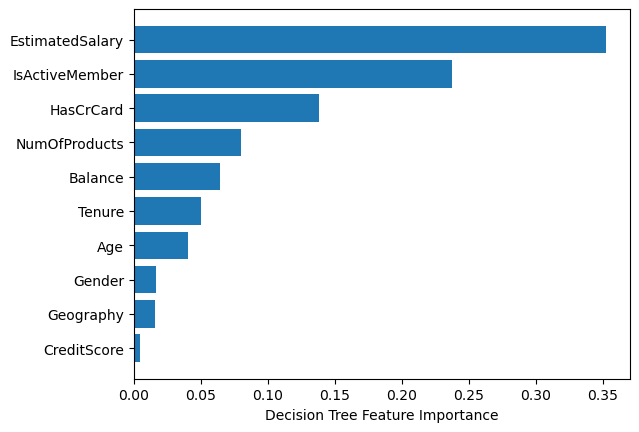

In [18]:
sorted_idx = gs_dt_tuned.feature_importances_.argsort()
plt.barh(X_train_df.columns,gs_dt_tuned.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

## 6. Random Forest Ensemble Technique

In [19]:
RF_model=RandomForestClassifier(max_depth=7,max_features=5,min_samples_leaf=10,min_samples_split=25,n_estimators=40,
                                class_weight='balanced',random_state=1)
RF_model.fit(X_train_df, y_train_df)

y_rf_train_predicted = RF_model.predict(X_train_df)
y_rf_validation_predicted = RF_model.predict(X_validation)
rf_score=get_metrics_score(RF_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('\n\nClassification report for the training data \n',classification_report(y_train_df, y_rf_train_predicted))
print('Classification report for the validation data \n',classification_report(y_validation, y_rf_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_rf_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_rf_validation_predicted))

Accuracy on training set :  0.8223484848484849
Accuracy on validation set :  0.7935185185185185
Recall on training set :  0.7658385093167702
Recall on validation set :  0.7477477477477478
Precision on training set :  0.5448519664162615
Precision on validation set :  0.4984984984984985
F1-Score on training set :  0.6367157242447714
F1-Score on validation set :  0.5981981981981982


Classification report for the training data 
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      6310
           1       0.54      0.77      0.64      1610

    accuracy                           0.82      7920
   macro avg       0.74      0.80      0.76      7920
weighted avg       0.85      0.82      0.83      7920

Classification report for the validation data 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       858
           1       0.50      0.75      0.60       222

    accuracy                   

## 7. RandomForest Tuned

In [20]:
param_grid = {
        #'max_depth': [5,7,9,11,13],
        'max_features': [3,5,7,9],
        'n_estimators': [25,30,35], # number of trees in the random forest
        'max_depth' : [5,7,10,15], # maximum number of levels allowed in each decision tree
        'min_samples_split' : [3,6,9,12], #,15,20,25,30, # minimum sample number to split a node
        'min_samples_leaf' : [10,12,15,18], # minimum sample number that can be stored in a leaf node
        'class_weight': ['balanced']
}

rf_tuned = RandomForestClassifier(random_state=123)

gs_rf = GridSearchCV(estimator = rf_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = True,
                      n_jobs= -1
                      )

gs_rf.fit(X_train_df, y_train_df)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 7, 10, 15],
                         'max_features': [3, 5, 7, 9],
                         'min_samples_leaf': [10, 12, 15, 18],
                         'min_samples_split': [3, 6, 9, 12],
                         'n_estimators': [25, 30, 35]},
             verbose=True)

In [21]:
print('Best Params are-', gs_rf.best_params_)
print('\n\nBest Score is-',gs_rf.best_score_)

# Set the clf to the best combination of parameters
gs_rf_tuned = gs_rf.best_estimator_

gs_rf_tuned.fit(X_train_df, y_train_df)

y_gs_rf_train_predicted = gs_rf_tuned.predict(X_train_df)
y_gs_rf_validation_predicted = gs_rf_tuned.predict(X_validation)

# summarize the fit of the model
print('\nClassification report for the training data \n',classification_report(y_train_df, y_gs_rf_train_predicted))
print('Classification report for the validation data \n',classification_report(y_validation, y_gs_rf_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_gs_rf_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_gs_rf_validation_predicted))

Best Params are- {'class_weight': 'balanced', 'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 35}


Best Score is- 0.8320707070707071

Classification report for the training data 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      6310
           1       0.69      0.84      0.76      1610

    accuracy                           0.89      7920
   macro avg       0.82      0.87      0.84      7920
weighted avg       0.90      0.89      0.89      7920

Classification report for the validation data 
               precision    recall  f1-score   support

           0       0.92      0.86      0.88       858
           1       0.55      0.69      0.62       222

    accuracy                           0.82      1080
   macro avg       0.73      0.77      0.75      1080
weighted avg       0.84      0.82      0.83      1080

Confusion matrix for the train data- 
 [[5696  614]
 [ 257 1353]]

Text(0.5, 0, 'Random Forest Feature Importance')

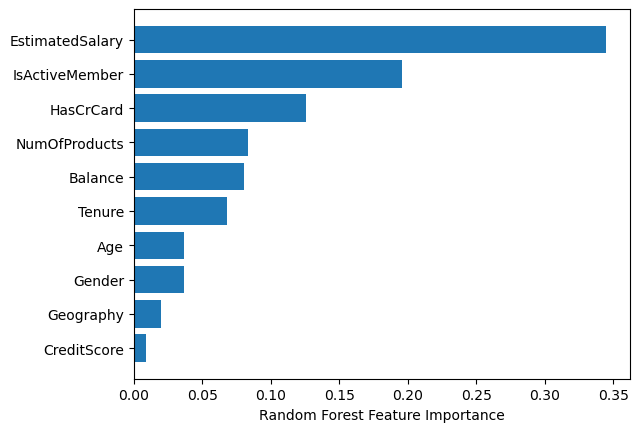

In [22]:
sorted_idx = gs_rf_tuned.feature_importances_.argsort()
plt.barh(X_train_df.columns,gs_rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## 8. Gradient Boosting

In [23]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train_df,y_train_df)
# make predictions for train data
y_gbc_train_predicted = gbc_model.predict(X_train_df)

# make predictions for validation data
y_gbc_validation_predicted = gbc_model.predict(X_validation)
gbc_score=get_metrics_score(gbc_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_gbc_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_gbc_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_gbc_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_gbc_validation_predicted))

Accuracy on training set :  0.8708333333333333
Accuracy on validation set :  0.8601851851851852
Recall on training set :  0.4826086956521739
Recall on validation set :  0.481981981981982
Precision on training set :  0.8035160289555325
Precision on validation set :  0.7482517482517482
F1-Score on training set :  0.6030267753201397
F1-Score on validation set :  0.5863013698630137
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      6310
           1       0.80      0.48      0.60      1610

    accuracy                           0.87      7920
   macro avg       0.84      0.73      0.76      7920
weighted avg       0.86      0.87      0.86      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       858
           1       0.75      0.48      0.59       222

    accuracy                           0

## 9. Gradient Boosting Tuned

In [24]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from article
param_grid = {
    "n_estimators": [20,30,40],
    "subsample":[0.9],
    "max_features":[0.8],
    "learning_rate": [0.1],
    'max_depth' : [1,2,3,4,5,10,15,20], # maximum number of levels allowed in each decision tree
    'min_samples_split' : [30,35,40,45], # minimum sample number to split a node
    'min_samples_leaf' : [3,6,9,12,15]
}


gs_gbc = GridSearchCV(estimator = gbc_tuned, 
                      param_grid = param_grid, 
                      cv = 3,
                      verbose = 1,
                      return_train_score = True,
                      n_jobs= -1
                      )

gs_gbc.fit(X_train_df, y_train_df)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': [0.8],
                         'min_samples_leaf': [3, 6, 9, 12, 15],
                         'min_samples_split': [30, 35, 40, 45],
                         'n_estimators': [20, 30, 40], 'subsample': [0.9]},
             return_train_score=True, verbose=1)

In [25]:
print('Best Params are-', gs_gbc.best_params_)
print('\n\nBest Score is-',gs_gbc.best_score_)

# Set the clf to the best combination of parameters
gs_gbc_tuned = gs_gbc.best_estimator_
gs_gbc_tuned.fit(X_train_df, y_train_df)

y_gs_gbc_train_predicted = gs_gbc_tuned.predict(X_train_df)
y_gs_gbc_validation_predicted = gs_gbc_tuned.predict(X_validation)

# summarize the fit of the model
print('Classification report for the training data \n',classification_report(y_train_df, y_gs_gbc_train_predicted))
print('Classification report for the validation data \n',classification_report(y_validation, y_gs_gbc_validation_predicted))
print('Confusion matrix for the train data- \n',confusion_matrix(y_train_df, y_gs_gbc_train_predicted))
print('\nConfusion matrix for the validation data- \n',confusion_matrix(y_validation, y_gs_gbc_validation_predicted))

Best Params are- {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.8, 'min_samples_leaf': 15, 'min_samples_split': 35, 'n_estimators': 40, 'subsample': 0.9}


Best Score is- 0.8632575757575758
Classification report for the training data 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6310
           1       0.84      0.49      0.61      1610

    accuracy                           0.88      7920
   macro avg       0.86      0.73      0.77      7920
weighted avg       0.87      0.88      0.86      7920

Classification report for the validation data 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       858
           1       0.75      0.49      0.59       222

    accuracy                           0.86      1080
   macro avg       0.81      0.72      0.75      1080
weighted avg       0.85      0.86      0.85      1080

Confusion matrix for the train data- 
 [[6156  154]


Text(0.5, 0, 'Gradient Boosting Feature Importance')

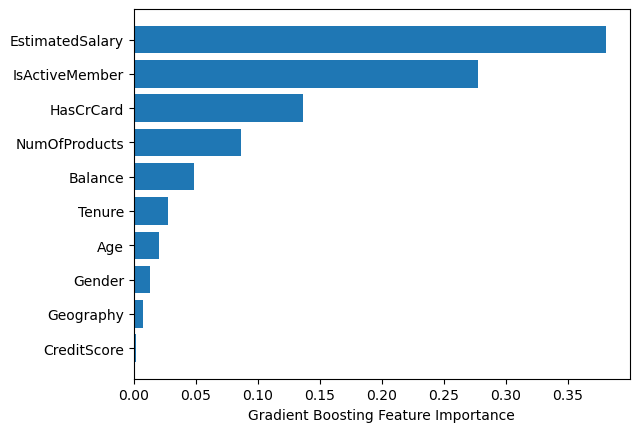

In [26]:
sorted_idx = gs_gbc_tuned.feature_importances_.argsort()
plt.barh(X_train_df.columns,gs_gbc_tuned.feature_importances_[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")

## 10. Bagging Classifier

In [27]:
bc_model = BaggingClassifier(random_state=1)
bc_model.fit(X_train_df,y_train_df)
# make predictions for train data
y_bc_train_predicted = bc_model.predict(X_train_df)

# make predictions for validation data
y_bc_validation_predicted = bc_model.predict(X_validation)
bc_score=get_metrics_score(bc_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_bc_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_bc_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_bc_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_bc_validation_predicted))

Accuracy on training set :  0.986489898989899
Accuracy on validation set :  0.8444444444444444
Recall on training set :  0.9347826086956522
Recall on validation set :  0.47297297297297297
Precision on training set :  0.9986728599867286
Precision on validation set :  0.6730769230769231
F1-Score on training set :  0.9656721206288097
F1-Score on validation set :  0.5555555555555555
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      6310
           1       1.00      0.93      0.97      1610

    accuracy                           0.99      7920
   macro avg       0.99      0.97      0.98      7920
weighted avg       0.99      0.99      0.99      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       858
           1       0.67      0.47      0.56       222

    accuracy                           

## 11. Ada Boosting Classifier

In [28]:
abc_model = AdaBoostClassifier(random_state=1)
abc_model.fit(X_train_df,y_train_df)
# make predictions for train data
y_abc_train_predicted = abc_model.predict(X_train_df)

# make predictions for validation data
y_abc_validation_predicted = abc_model.predict(X_validation)
abc_score=get_metrics_score(abc_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_abc_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_abc_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_abc_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_abc_validation_predicted))

Accuracy on training set :  0.8571969696969697
Accuracy on validation set :  0.862037037037037
Recall on training set :  0.4745341614906832
Recall on validation set :  0.5405405405405406
Precision on training set :  0.7283126787416587
Precision on validation set :  0.718562874251497
F1-Score on training set :  0.5746521248589694
F1-Score on validation set :  0.6169665809768637
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      6310
           1       0.73      0.47      0.57      1610

    accuracy                           0.86      7920
   macro avg       0.80      0.71      0.74      7920
weighted avg       0.85      0.86      0.85      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       858
           1       0.72      0.54      0.62       222

    accuracy                           0.

## 12 Voting Classifier

In [29]:
# defining list of models
estimator= [('LR',lr_model), ('LDA',lda_model), ('GNB',GNB_model), ('DT',dt_model), ('GSDT',gs_dt_tuned), ('RF',RF_model),
            ('GSRF',gs_rf_tuned), ('GBC',gbc_model), ('GSGBC',gs_gbc_tuned), ('BC', bc_model),('ABC',abc_model)]

In [30]:
soft_vc_model = VotingClassifier(estimators= estimator, voting='soft')
soft_vc_model.fit(X_train_df,y_train_df)

# make predictions for train data
y_soft_vc_train_predicted = soft_vc_model.predict(X_train_df)

# make predictions for validation data
y_soft_vc_validation_predicted = soft_vc_model.predict(X_validation)
soft_vc_score=get_metrics_score(abc_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_soft_vc_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_soft_vc_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_soft_vc_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_soft_vc_validation_predicted))

Accuracy on training set :  0.8571969696969697
Accuracy on validation set :  0.862037037037037
Recall on training set :  0.4745341614906832
Recall on validation set :  0.5405405405405406
Precision on training set :  0.7283126787416587
Precision on validation set :  0.718562874251497
F1-Score on training set :  0.5746521248589694
F1-Score on validation set :  0.6169665809768637
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      6310
           1       0.91      0.72      0.80      1610

    accuracy                           0.93      7920
   macro avg       0.92      0.85      0.88      7920
weighted avg       0.93      0.93      0.92      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       858
           1       0.70      0.58      0.63       222

    accuracy                           0.

In [31]:
hard_vc_model = VotingClassifier(estimators= estimator, voting='hard')
hard_vc_model.fit(X_train_df,y_train_df)

# make predictions for train data
y_hard_vc_train_predicted = hard_vc_model.predict(X_train_df)

# make predictions for validation data
y_hard_vc_validation_predicted = hard_vc_model.predict(X_validation)
hard_vc_score=get_metrics_score(abc_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_hard_vc_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_hard_vc_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_hard_vc_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_hard_vc_validation_predicted))

Accuracy on training set :  0.8571969696969697
Accuracy on validation set :  0.862037037037037
Recall on training set :  0.4745341614906832
Recall on validation set :  0.5405405405405406
Precision on training set :  0.7283126787416587
Precision on validation set :  0.718562874251497
F1-Score on training set :  0.5746521248589694
F1-Score on validation set :  0.6169665809768637
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6310
           1       0.85      0.65      0.74      1610

    accuracy                           0.91      7920
   macro avg       0.88      0.81      0.84      7920
weighted avg       0.90      0.91      0.90      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       858
           1       0.70      0.54      0.61       222

    accuracy                           0.

<Figure size 1200x600 with 0 Axes>

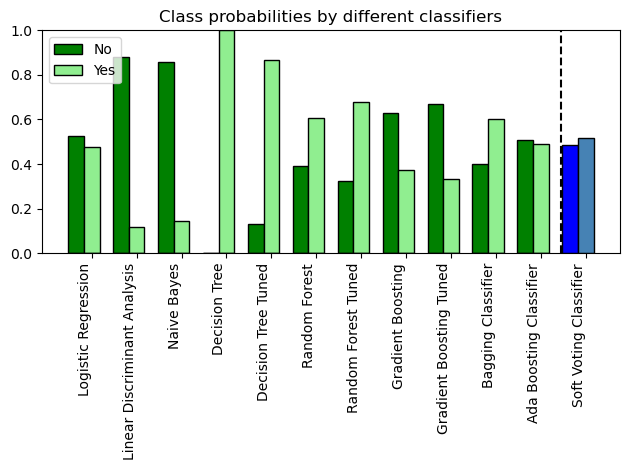

In [32]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model]

probability_list = [c.fit(X_train_df, y_train_df).predict_proba(X) for c in models_list]

class1_1 = [pr[0, 0] for pr in probability_list]
class2_1 = [pr[0, 1] for pr in probability_list]

# plotting

N = 12  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
fig, ax = plt.subplots()

# bars for classifier 1-11
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(10.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
     'Random Forest','Random Forest Tuned', 'Gradient Boosting','Gradient Boosting Tuned',
     'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier'],
    rotation=90,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities by different classifiers")
plt.legend([p1[0], p2[0]], ["No", "Yes"], loc="upper left")
plt.tight_layout()
plt.show()

In [33]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
          abc_model, soft_vc_model, hard_vc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier','Soft Voting Classifier', 'Hard Voting Classifier']

all_model_comparison = get_summary_of_models(models_list)

all_model_comparison = all_model_comparison.set_index(pd.Index(index_list))

all_model_comparison

,TrainAccuracy,validationAccuracy,Train_Recall,validationRecall,TrainPrecision,validationPrecision,TrainF1Score,validationF1Score
Logistic Regression,0.65,0.66,0.67,0.73,0.33,0.35,0.44,0.47
Linear Discriminant Analysis,0.81,0.80,0.19,0.19,0.56,0.55,0.28,0.28
Naive Bayes,0.78,0.79,0.06,0.09,0.34,0.40,0.11,0.14
Decision Tree,1.00,0.80,1.00,0.56,1.00,0.52,1.00,0.54
Decision Tree Tuned,0.81,0.76,0.84,0.77,0.51,0.45,0.64,0.56
Random Forest,0.82,0.79,0.77,0.75,0.54,0.50,0.64,0.60
Random Forest Tuned,0.89,0.82,0.84,0.69,0.69,0.55,0.76,0.62
Gradient Boosting Classifier,0.87,0.86,0.48,0.48,0.80,0.75,0.60,0.59
Gradient Boosting Classifier Tuned,0.88,0.86,0.49,0.49,0.84,0.75,0.61,0.59
Bagging Classifier,0.99,0.84,0.93,0.47,1.00,0.67,0.97,0.56


In [34]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model]

index_list = ['Logistic Regression','Linear Discriminant Analysis','Naive Bayes','Decision Tree','Decision Tree Tuned', 
              'Random Forest','Random Forest Tuned', 'Gradient Boosting Classifier','Gradient Boosting Classifier Tuned',
              'Bagging Classifier','Ada Boosting Classifier']

model_auc_score = get_ROC_AUC_score_of_models(models_list)

model_auc_score = model_auc_score.set_index(pd.Index(index_list))

model_auc_score

,Train ROC-AUC Score,validation ROC-AUC Score
Logistic Regression,0.70,0.73
Linear Discriminant Analysis,0.76,0.76
Naive Bayes,0.74,0.76
Decision Tree,1.00,0.71
Decision Tree Tuned,0.91,0.82
Random Forest,0.89,0.86
Random Forest Tuned,0.95,0.85
Gradient Boosting Classifier,0.89,0.87
Gradient Boosting Classifier Tuned,0.89,0.86
Bagging Classifier,1.00,0.81


# 13. Light GBM Classifier

In [35]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(boosting_type='rf', num_leaves=45, max_depth= 6, 
                               learning_rate=0.1, n_estimators=90, class_weight={0 : 1, 1 : 3}, 
                               min_child_samples=20, colsample_bytree=0.6, reg_alpha=0.3, 
                               reg_lambda=1.0, n_jobs=- 1, importance_type = 'gain', force_col_wise=True)

In [36]:
lgbm_model.fit(X_train_df,y_train_df)

# make predictions for train data
y_lgbm_train_predicted = lgbm_model.predict(X_train_df)

# make predictions for validation data
y_lgbm_validation_predicted = lgbm_model.predict(X_validation)
# lgbm_score=get_metrics_score(lgbm_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_lgbm_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_lgbm_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_lgbm_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_lgbm_validation_predicted))

[LightGBM] [Info] Number of positive: 1610, number of negative: 6310
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433573 -> initscore=-0.267289
[LightGBM] [Info] Start training from score -0.267289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

# 14. StackingCVClassifier

In [37]:
models_list = [lr_model, lda_model, GNB_model, dt_model, gs_dt_tuned, RF_model, gs_rf_tuned, gbc_model, gs_gbc_tuned, bc_model, 
              abc_model, lgbm_model]

In [38]:
from mlxtend.classifier import StackingCVClassifier

stack_clf_model = StackingCVClassifier(classifiers= models_list,
                                       shuffle = False,
                                       use_probas = True,
                                       cv = 5,
                                       meta_classifier = gs_rf_tuned
                                      )
stack_clf_model.fit(X_train_df,y_train_df)

# make predictions for train data
y_stack_clf_train_predicted = stack_clf_model.predict(X_train_df)

# make predictions for validation data
y_stack_clf_validation_predicted = stack_clf_model.predict(X_validation)
stack_clf_score=get_metrics_score(stack_clf_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_stack_clf_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_stack_clf_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_stack_clf_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_stack_clf_validation_predicted))

[LightGBM] [Info] Number of positive: 1288, number of negative: 5048
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433573 -> initscore=-0.267289
[LightGBM] [Info] Start training from score -0.267289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1288, number of negative: 5048
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 6336, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433573 -> initscore=-0.267289
[LightGBM] [Info] Start training from score -0.267289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Accuracy on training set :  0.8578282828282828
Accuracy on validation set :  0.825925925925926
Recall on training set :  0.698136645962733
Recall on validation set :  0.6936936936936937
Precision on training set :  0.63718820861678
Precision on validation set :  0.5620437956204379
F1-Score on training set :  0.6662714878482514
F1-Score on validation set :  0.6209677419354839
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      6310
           1       0.64      0.70      0.67      1610

    accuracy                           0.86      7920
   macro avg       0.78      0.80      0.79      7920
weighted avg       0.86      0.86      0.86      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       858
           1       0.56      0.69      0.62       222

    accuracy                           0.83

In [39]:
models_list = [ ('lr',lr_model),('lda',lda_model), ('GNB',GNB_model), ('dt', dt_model), ('gs_dt',gs_dt_tuned), ('rf',RF_model), 
                ('gs_rf', gs_rf_tuned), ('gbc', gbc_model), ('gs_gbc', gs_gbc_tuned), ('bc', bc_model), ('abc', abc_model), 
                ('lgbm', lgbm_model) ]

In [40]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
stack_model = StackingClassifier(estimators = models_list, final_estimator = lr)
# score = cross_val_score(stack_model, X_train_df, y_train_df, cv = 5, scoring = 'f1')

stack_model.fit(X_train_df, y_train_df)

[LightGBM] [Info] Number of positive: 1610, number of negative: 6310
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 7920, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433573 -> initscore=-0.267289
[LightGBM] [Info] Start training from score -0.267289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

StackingClassifier(estimators=[('lr',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=123)),
                               ('lda',
                                LinearDiscriminantAnalysis(n_components=1)),
                               ('GNB', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('gs_dt',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=10,
                                                       min_samples_leaf=24,
                                                       min_samples_spl...
                                                           subsample=0.9)),
                               ('bc', BaggingClassifier(random_state=1)),
                               ('abc', AdaBoostClassifier(random_state=1)),
                               ('lgbm',
                                LGBMClassifier(boosting_type='rf',
                                               class_weight={0: 1, 1: 3},
                                               colsample_bytree=0.6,
                                               force_col_wise=True,
                                               importance_type='gain',
                                               max_depth=6, n_estimators=90,
                                               n_jobs=-1, num_leaves=45,
                                               reg_alpha=0.3,
                                               reg_lambda=1.0))],
                   final_estimator=LogisticRegression())

In [41]:
# make predictions for train data
y_stack_train_predicted = stack_model.predict(X_train_df)

# make predictions for validation data
y_stack_validation_predicted = stack_model.predict(X_validation)
stack_score=get_metrics_score(stack_model,X_train_df, X_validation, y_train_df, y_validation)

# summarize the fit of the model
print('Classification Report for Training Data- \n',classification_report(y_train_df, y_stack_train_predicted))
print('Classification Report for validation Data- \n',classification_report(y_validation, y_stack_validation_predicted))
print('Confusion Matrix for Training Data- \n',confusion_matrix(y_train_df, y_stack_train_predicted))
print('\nConfusion Matrix for validation Data - \n',confusion_matrix(y_validation, y_stack_validation_predicted))

Accuracy on training set :  0.8762626262626263
Accuracy on validation set :  0.8537037037037037
Recall on training set :  0.5335403726708075
Recall on validation set :  0.5045045045045045
Precision on training set :  0.7895220588235294
Precision on validation set :  0.7
F1-Score on training set :  0.6367679762787251
F1-Score on validation set :  0.5863874345549738
Classification Report for Training Data- 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      6310
           1       0.79      0.53      0.64      1610

    accuracy                           0.88      7920
   macro avg       0.84      0.75      0.78      7920
weighted avg       0.87      0.88      0.87      7920

Classification Report for validation Data- 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       858
           1       0.70      0.50      0.59       222

    accuracy                           0.85      1080


## StackingCVClassifier, LightGBM and Random Forest seems to be the best performing models.

### With Respect to 'Recall' Metrics - Decision Tree Classifier Tuned and Random Forest is considered to the best models